In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
plt.rcParams["font.family"] = "Times New Roman"

In [27]:
ball_milling_data = pd.read_csv('/Users/sarah/Documents/areospace research/material recycling project/PyImageJ-Particle-Analysis/Ball Milling Powder Samples/BallMilling ML Data.csv')
ball_milling_data = ball_milling_data.loc[(ball_milling_data['Feret'] >= 40) & (ball_milling_data['Feret'] <= 110)]
ball_milling_data.columns

Index(['Tag', 'Ball-Powder Ratio', 'Jar', '20mm Run Time (Hours)',
       '10mm Run Time (Hours)', '6mm Run Time (Hours)',
       'Total Run Time (Hours)', 'Circ.', 'Feret', 'AR', 'Round', 'Area',
       'Mean', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Major', 'Minor',
       'Angle', 'IntDen', 'RawIntDen', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'Solidity', 'Skew', 'Slice', 'Kurt', 'Median', '%Area',
       'StdDev', 'Min', 'Max', 'X', 'Y'],
      dtype='object')

In [28]:
valid_tags_a = ['C1-20', 'C2-20', 'D1-10', 'D2-10', 'E1-10', 'E2-10', 'F1-10', 'F2-10', 'G1-6', 'G2-6', 'H1-6', 'H2-6'] #20-10-6
filtered_df_figa = ball_milling_data[ball_milling_data['Tag'].isin(valid_tags_a)]

valid_tag_b = ['A1', 'A2', 'A3','A4','A5','A6'] #20-10
filtered_df_figb = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_b)]

valid_tag_c = ['J1-20', 'J2-20','K1-6', 'K2-6', 'L1-6', 'L2-6', 'M1-6','M2-6'] #20-6
filtered_df_figc = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_c)]

valid_tag_d = ['4-O1', '4-P1','4-P2', '4-Q1-10', '4-Q2-10'] #10-6
filtered_df_figd = ball_milling_data[ball_milling_data['Tag'].isin(valid_tag_d)]

In [29]:
def add_frequency_stats_to_dataframe(DataFrame, target_column_name) :


    df = DataFrame.sort_values(by=target_column_name).copy ()
    frequencies = df[target_column_name].value_counts().sort_index()
    # Map the raw frequency to each row in the DataFrame
    df ["Frequency"] = df [target_column_name].map (frequencies)
    # Calculate cumulative frequency as a percentage of the total count
    cumulative_frequency = frequencies. cumsum() / df.shape [0] * 100
    df ["Cumulative Frequency"] = df [target_column_name].map (cumulative_frequency)
    # Add particle number column
    df ["Particle_number"] = np.arange(1, len(df) + 1)
    
    return df

df = add_frequency_stats_to_dataframe(filtered_df_figd, target_column_name='Feret')
df

,Tag,Ball-Powder Ratio,Jar,20mm Run Time (Hours),10mm Run Time (Hours),6mm Run Time (Hours),Total Run Time (Hours),Circ.,Feret,AR,...,Median,%Area,StdDev,Min,Max,X,Y,Frequency,Cumulative Frequency,Particle_number
104986,4-Q2-10,7:5:1,2.0,0.0,61.7,0.0,61.7,0.647,40.000,1.556,...,255,100,0,255,255,392.780,612.599,5,0.103778,1
101450,4-Q2-10,7:5:1,2.0,0.0,61.7,0.0,61.7,0.737,40.000,1.223,...,255,100,0,255,255,646.992,334.230,5,0.103778,2
104140,4-Q2-10,7:5:1,2.0,0.0,61.7,0.0,61.7,0.750,40.000,1.328,...,255,100,0,255,255,931.492,850.121,5,0.103778,3
59874,4-P1,7:5:1,1.0,0.0,0.0,61.7,61.7,0.749,40.000,1.313,...,255,100,0,255,255,211.205,898.668,5,0.103778,4
104774,4-Q2-10,7:5:1,2.0,0.0,61.7,0.0,61.7,0.851,40.000,1.293,...,255,100,0,255,255,136.500,66.375,5,0.103778,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14053,4-O1,7:5:1,1.0,0.0,0.0,61.7,61.7,0.691,109.786,1.487,...,255,100,0,255,255,814.463,786.405,1,99.916978,4814
40808,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.676,109.809,1.165,...,255,100,0,255,255,263.187,682.080,1,99.937733,4815
39946,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.769,109.895,1.381,...,255,100,0,255,255,859.646,70.641,1,99.958489,4816
40229,4-P2,7:5:1,2.0,0.0,0.0,61.7,61.7,0.634,109.932,1.478,...,255,100,0,255,255,60.891,712.689,1,99.979244,4817


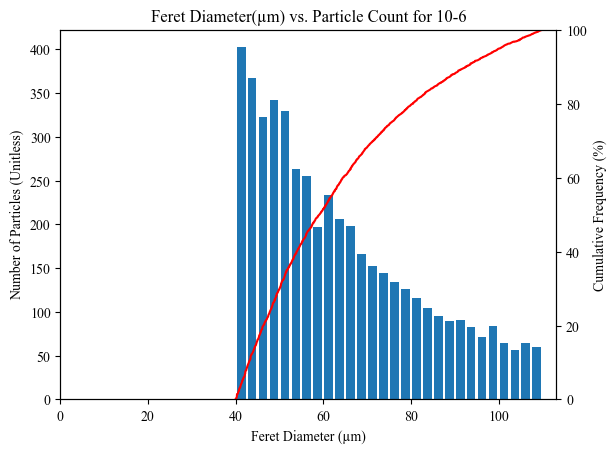

In [30]:
fig, ax1 = plt.subplots()
# sort data based on run times
ax1.hist(df['Feret'], bins=28, rwidth=0.8)
ax1.set_xlim(left=0)
#ax1.set_xticks(np.arange(0, 120, 10))
ax1.set_xlabel('Feret Diameter (µm)')
ax1.set_ylabel('Number of Particles (Unitless)')
ax1.set_title('Feret Diameter(µm) vs. Particle Count for 10-6')

# Create a secondary y-axis (ax2)
ax2 = ax1.twinx()
ax2.plot(df['Feret'], df['Cumulative Frequency'], color='red')
ax2.set_ylabel('Cumulative Frequency (%)')
ax2.set_ylim(0, 100)

# Show the plot
# include number of particles and unitless, include units, do both sieved and unsieved 
plt.show()

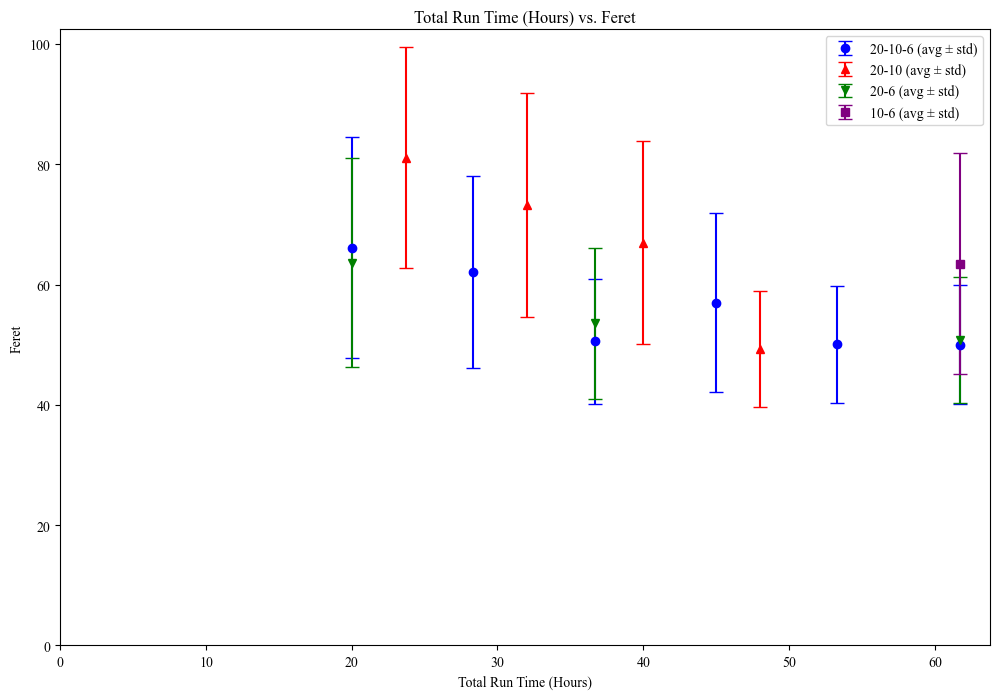

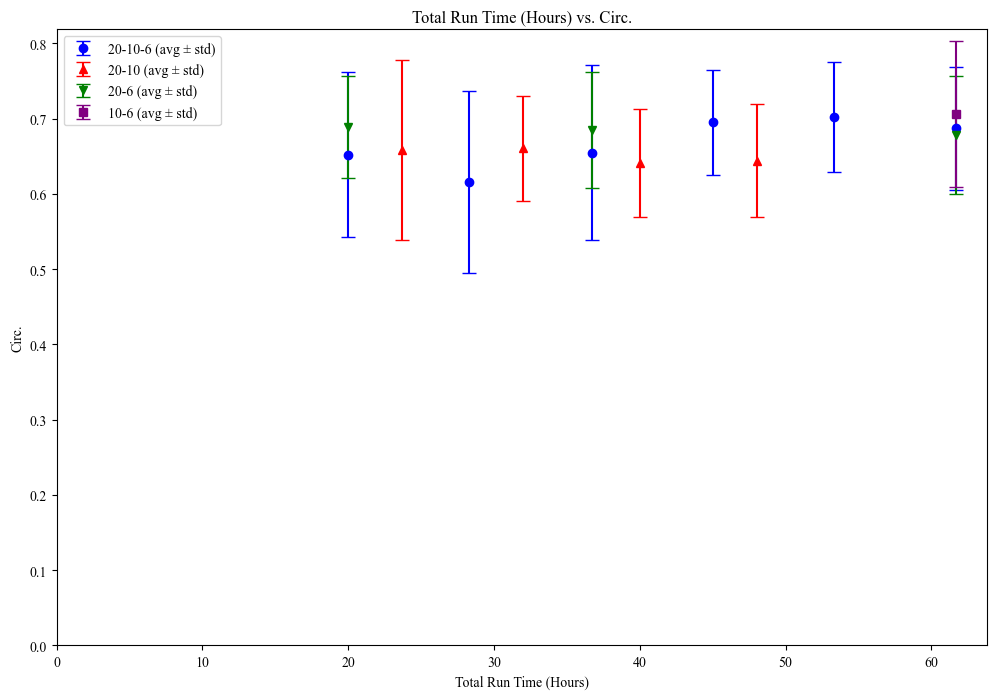

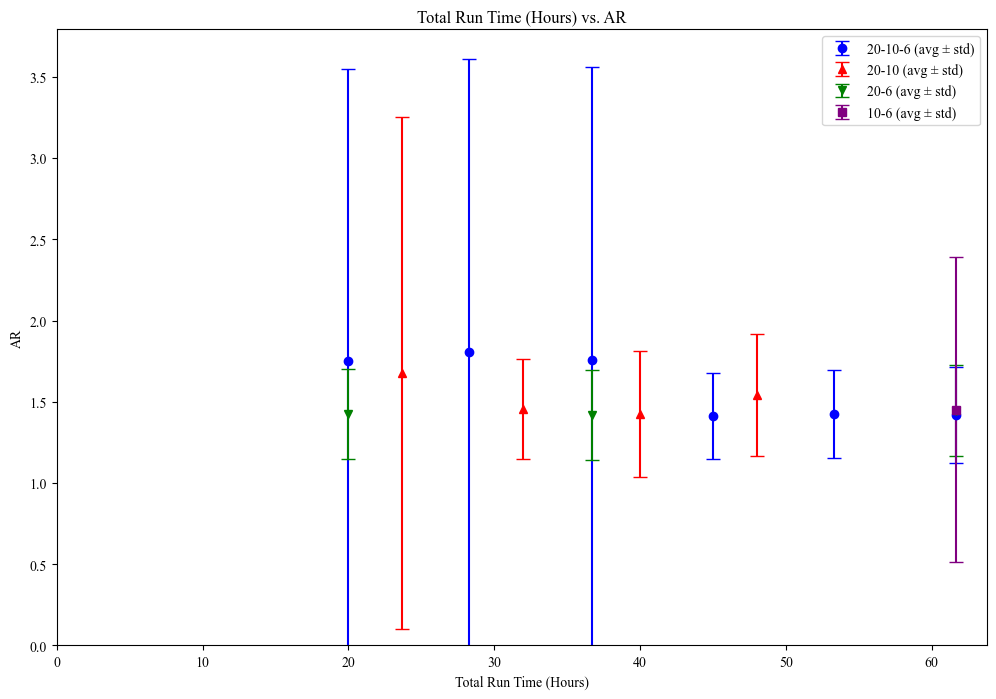

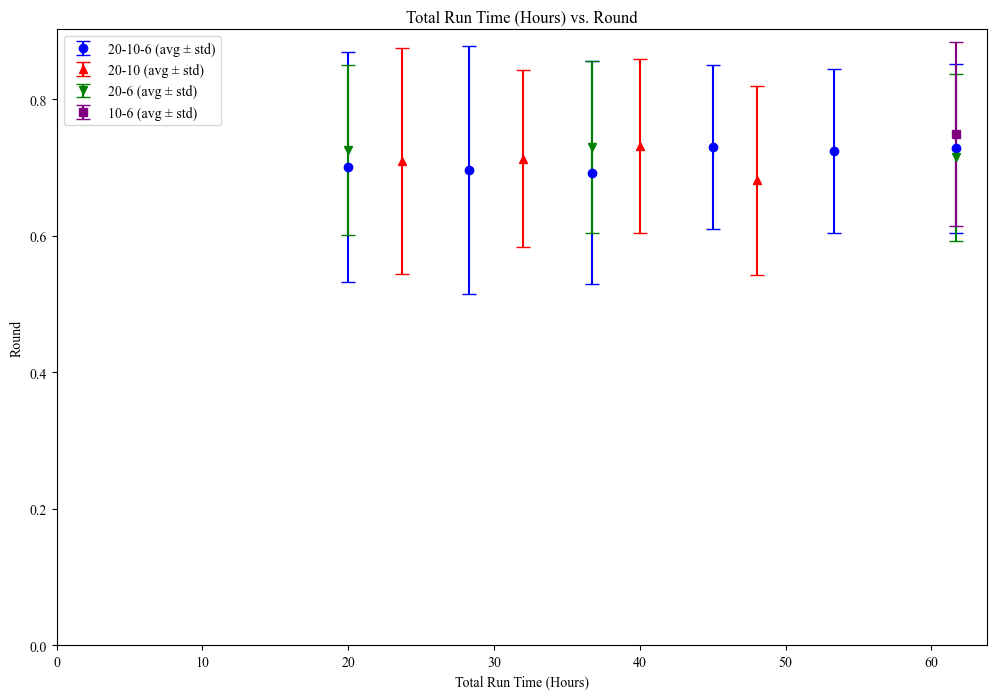

In [33]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_time_vs_parameter(filtered_df_figa, filtered_df_figb, filtered_df_figc, filtered_df_figd, parameters):
    for parameter in parameters:
        # Create a new figure for each parameter
        plt.figure(figsize=(12, 8))
        
        # Calculate averages and standard deviations for scatter plot
        grouped_a = filtered_df_figa.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_b = filtered_df_figb.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_c = filtered_df_figc.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        grouped_d = filtered_df_figd.groupby("Total Run Time (Hours)")[parameter].agg(["mean", "std"]).reset_index()
        
        # Scatter plot with error bars
        plt.errorbar(grouped_a['Total Run Time (Hours)'], grouped_a['mean'], yerr=grouped_a['std'], 
                     fmt='o', color='blue', label='20-10-6 (avg ± std)', capsize=5)
        plt.errorbar(grouped_b['Total Run Time (Hours)'], grouped_b['mean'], yerr=grouped_b['std'], 
                     fmt='^', color='red', label='20-10 (avg ± std)', capsize=5)
        plt.errorbar(grouped_c['Total Run Time (Hours)'], grouped_c['mean'], yerr=grouped_c['std'], 
                     fmt='v', color='green', label='20-6 (avg ± std)', capsize=5)
        plt.errorbar(grouped_d['Total Run Time (Hours)'], grouped_d['mean'], yerr=grouped_d['std'], 
                     fmt='s', color='purple', label='10-6 (avg ± std)', capsize=5)

        # Add labels, title, and legend
        plt.xlabel('Total Run Time (Hours)')
        plt.ylabel(parameter)
        plt.title(f'Total Run Time (Hours) vs. {parameter}')
        plt.legend()
        plt.xlim(left=0)
        plt.ylim(bottom=0)
        
        # Display the plot
        plt.show()


plot_time_vs_parameter(filtered_df_figa, filtered_df_figb, filtered_df_figc, filtered_df_figd , parameters=['Feret','Circ.','AR','Round'])

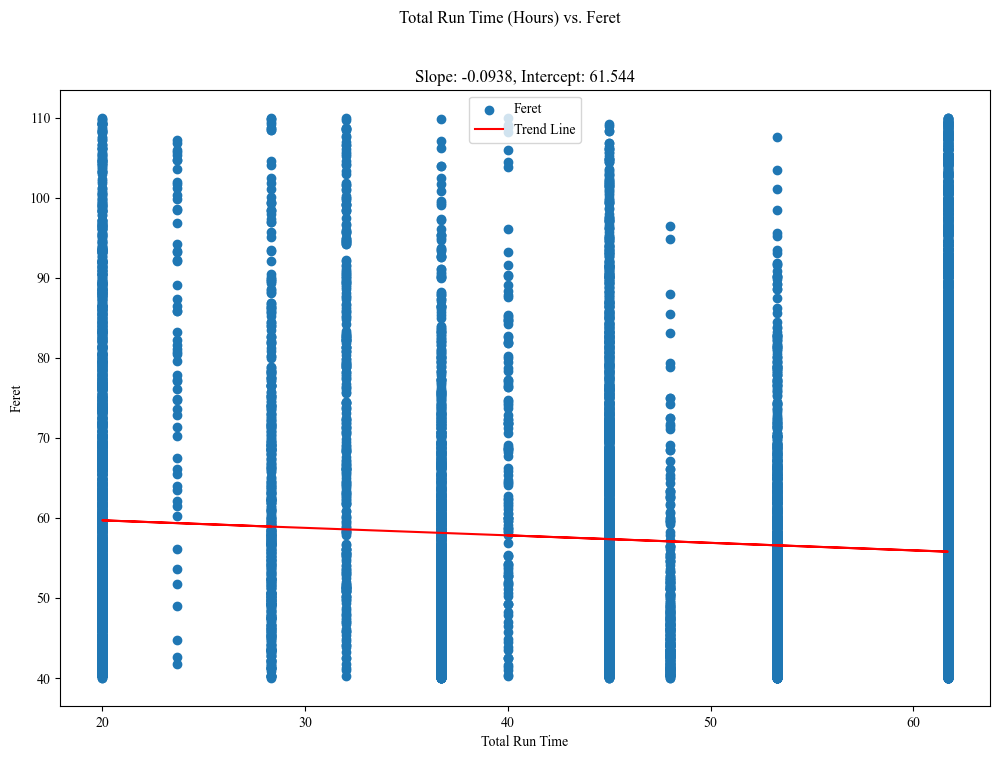

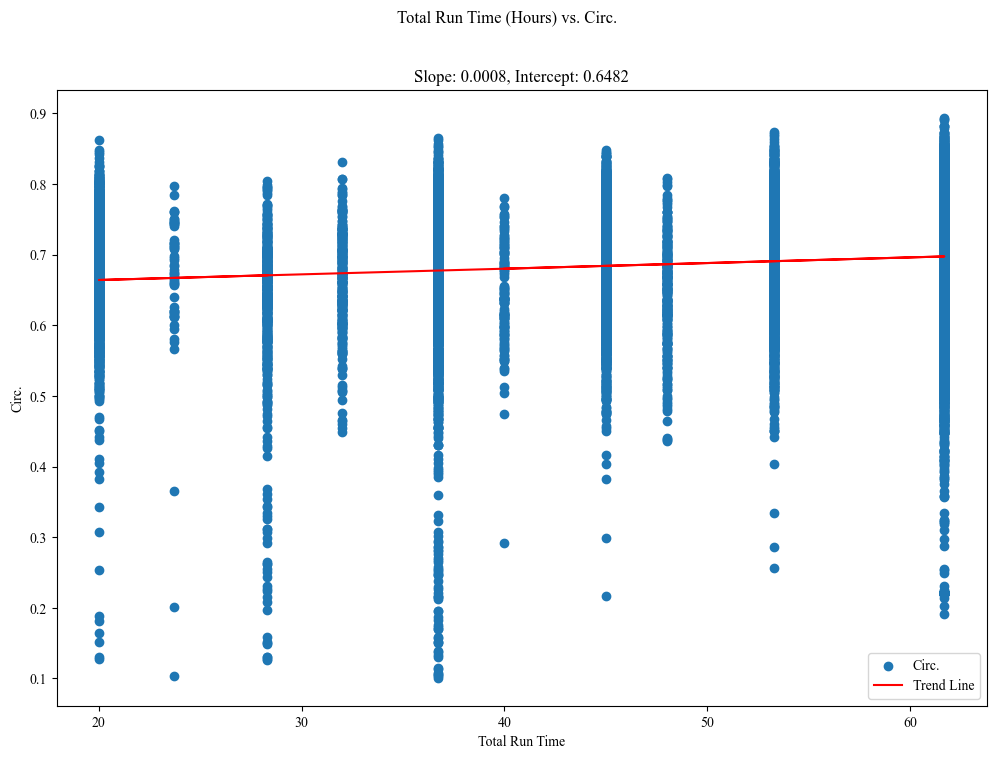

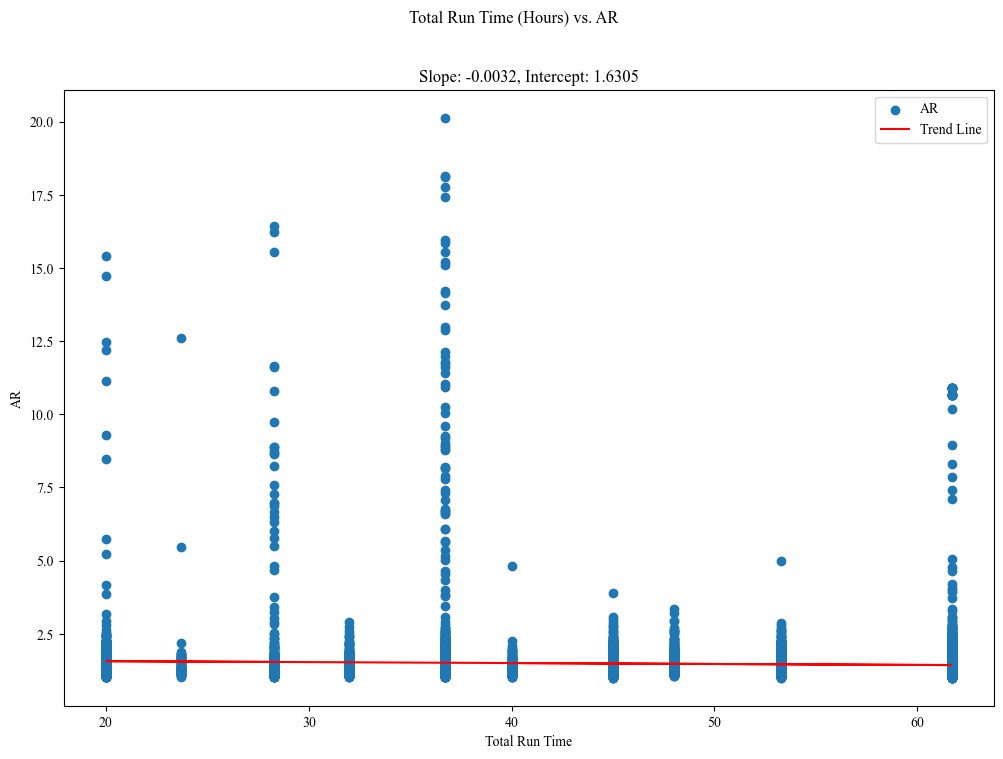

In [32]:
def plot_all_time_vs_parameter(ball_milling_data, parameters):
    for parameter in parameters: 
        plt.figure(figsize=(12, 8))
        plt.scatter(ball_milling_data['Total Run Time (Hours)'], ball_milling_data[parameter], label=parameter)
        slope, intercept = np.polyfit(ball_milling_data['Total Run Time (Hours)'], ball_milling_data[parameter], 1)

        slope = round(slope, 4)
        intercept = round(intercept, 4)

        trend_line = slope * ball_milling_data['Total Run Time (Hours)'] + intercept

        # Plot the trend line
        plt.plot(ball_milling_data['Total Run Time (Hours)'], trend_line, color='red', label='Trend Line')


        plt.xlabel('Total Run Time')
        plt.ylabel(parameter)
        plt.legend()
        plt.suptitle(f'Total Run Time (Hours) vs. {parameter}')
        plt.title(f'Slope: {slope}, Intercept: {intercept}')
        plt.show()

plot_all_time_vs_parameter(ball_milling_data, parameters=['Feret','Circ.','AR'])